# 1. Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 2. Loading and Preprocessing the Data

In [ ]:
# Assign the csv file to df
df = pd.read_csv('Data/clean.csv')

# Change the datatype to date
df['date'] = pd.to_datetime(df['date']) 

# Extract the month from date column to create the month column
df['month'] = df['date'].dt.month 

# 3. Defining Seasons and Extracting Year

In [ ]:
# This is to create the column season based on column month created earlier
def assign_month(month):
    if month in [12, 1, 2]:
        return 'winter'
    if month in [6, 7, 8]:
        return 'summer'
    if month in [3, 4, 5]:
        return 'spring'
    else:
        return 'fall'

    
df['season'] = df['month'].apply(assign_month)

df['year'] = None

# If the month is 12, then that winter month is counted for the next year
df.loc[(df['month'] == 12), 'year'] = df['date'].dt.year + 1    
# Else, it will remain the same
df.loc[~df['month'].isin([12]), 'year'] = df['date'].dt.year    




In [ ]:
# Assign the dataframe only includes winter and summer season for analysing the research question
df_season = df[df['season'].isin(['winter', 'summer'])]    

# 4. Create mean value column for temperature and rain_sum

In [ ]:
# Create the mean column for temperature and rain to have a average temp and rain in winter and summer.
seasonal_stats = df_season.groupby(['City', 'season', 'year']).agg({
    'temperature_2m_mean': 'mean',
    'rain_sum': 'mean'
}).reset_index()



# 5. Seasonal Trends Analysis

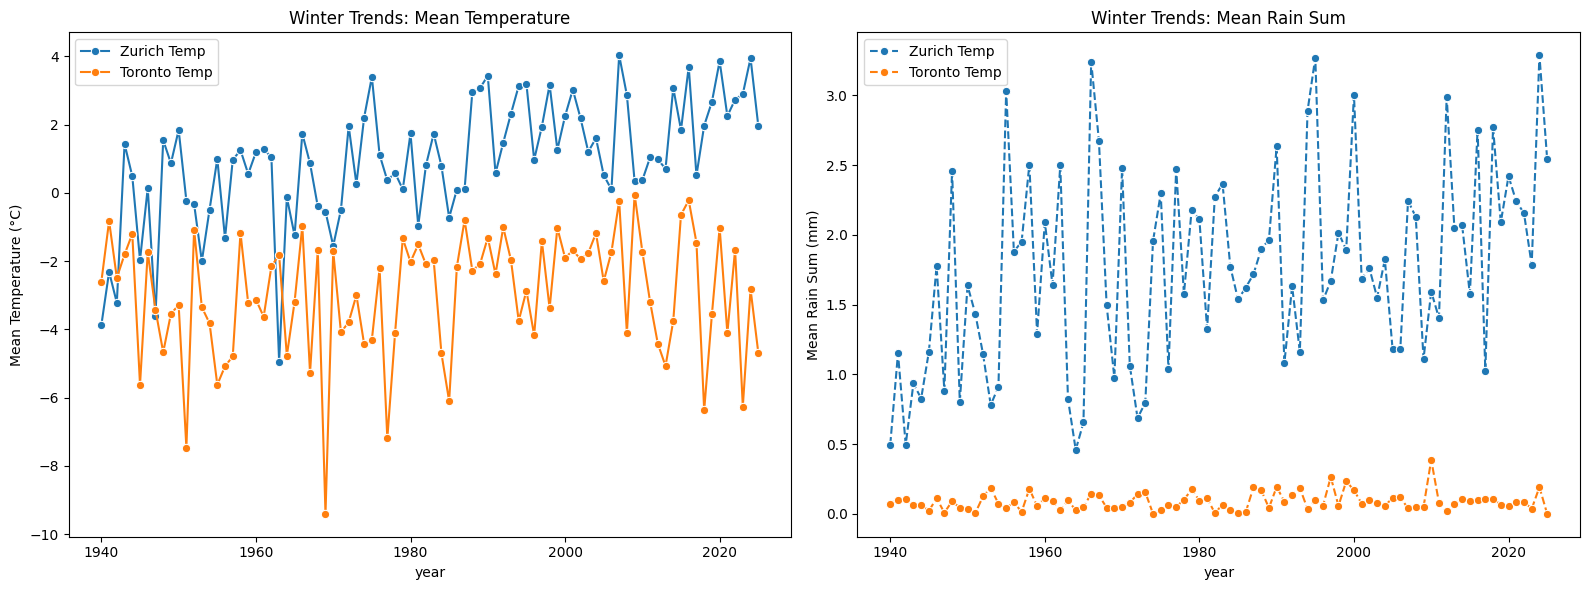

In [ ]:
# Only taking data that is in the winter season
winter_stats = seasonal_stats[seasonal_stats['season'] == 'winter'] 

# Creating a 1x2 grid of plots for side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

cities = ['Zurich', 'Toronto']

for city in cities:
    city_data = winter_stats[winter_stats['City'] == city]
    sns.lineplot(data = city_data, x = 'year', y = 'temperature_2m_mean', marker = 'o', label = f'{city} Temp', ax = ax1)
ax1.set_title('Winter Trends: Mean Temperature')
ax1.set_ylabel('Mean Temperature (°C)')
ax1.legend()


for city in cities:
    city_data = winter_stats[winter_stats['City'] == city]
    sns.lineplot(data = city_data, x = 'year', y = 'rain_sum', marker = 'o', linestyle = '--', label = f'{city} Temp', ax = ax2)
ax2.set_title('Winter Trends: Mean Rain Sum')
ax2.set_ylabel('Mean Rain Sum (mm)')
ax2.legend()

plt.tight_layout()
plt.show()


The left-hand chart shows that winter temperatures in Zurich are generally a few degrees warmer than in Toronto. This is likely because Zurich’s weather benefits from the moderating effects of nearby water, while Toronto, being more inland, experiences colder, more variable winters. Although Zurich have ups and downs in temperature from year to year, there's a clear overall warming trend in winter starting around the 1960s.

In the right-hand chart, we see that Zurich also gets significantly more winter rain than Toronto. In Toronto, most of the winter precipitation comes as snow, which explains the very low rain totals. Meanwhile, Zurich’s milder conditions lead to more rain events. Despite some variability from year to year in Zurich’s rainfall, there isn’t a strong, consistent trend over time. Overall, these charts highlight the distinct climate differences: Zurich enjoys milder, wetter winters, whereas Toronto experiences colder winters with more snowfall.

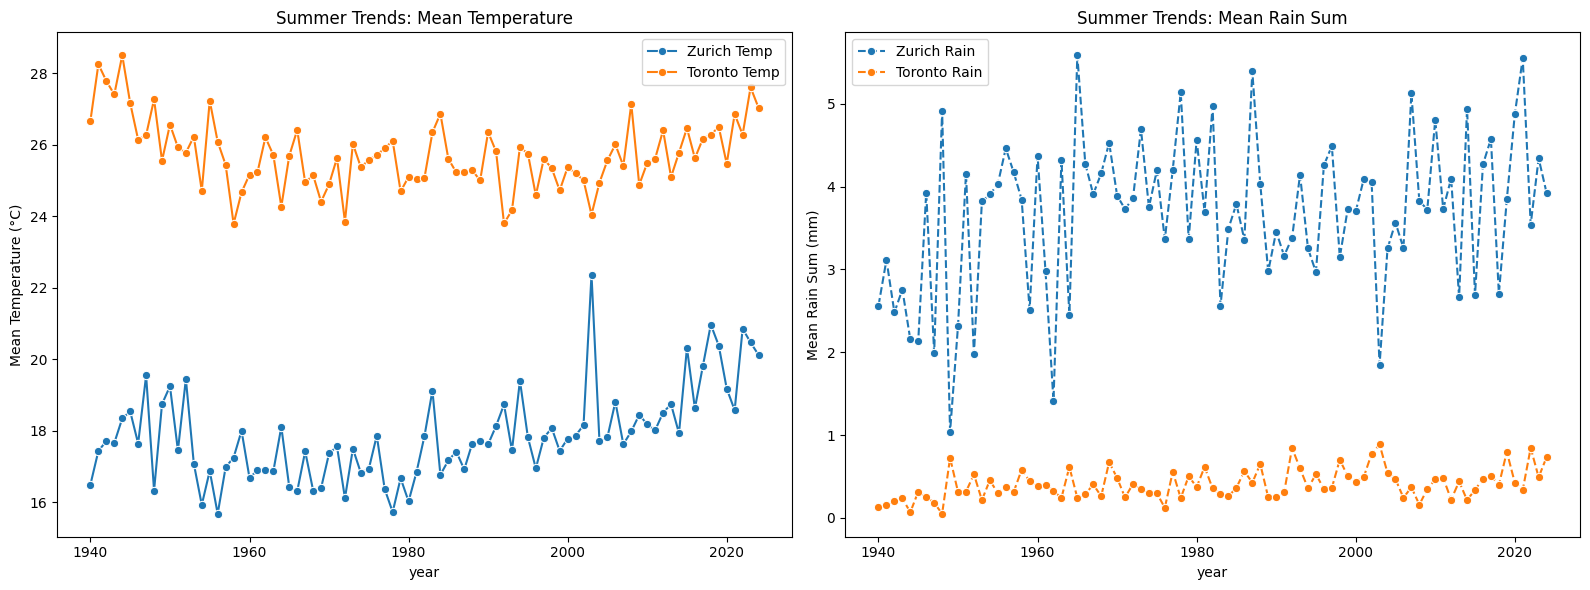

In [ ]:
# Only taking data that is in the summer season
summer_stats = seasonal_stats[seasonal_stats['season'] == 'summer']     

cities = ['Zurich', 'Toronto']

# Creating a 1x2 grid of plots for side-by-side comparison
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 6))

for city in cities:
    city_data = summer_stats[summer_stats['City'] == city]
    sns.lineplot(data = city_data, x = 'year', y = 'temperature_2m_mean', marker = 'o', label = f'{city} Temp', ax = ax3) 

ax3.set_title('Summer Trends: Mean Temperature')
ax3.set_ylabel('Mean Temperature (°C)')
ax3.legend()


for city in cities:
    city_data = summer_stats[summer_stats['City'] == city]
    sns.lineplot(data = city_data, x = 'year', y = 'rain_sum', marker = 'o', linestyle = '--', label = f'{city} Rain', ax = ax4)

ax4.set_title('Summer Trends: Mean Rain Sum')
ax4.set_ylabel('Mean Rain Sum (mm)')
ax4.legend()

plt.tight_layout()
plt.show()

During the summer, Toronto tends to have higher average temperatures, compared to Zurich, which usually stays in the lower 20s. Although both cities show some year-to-year fluctuations, there appears to be a slight overall warming trend across the decades in Zurich and there appears to start increasing in temperature again in Toronto from 2000 onwards.

In terms of rainfall, Zurich typically sees more summer rain, often exceeding 200 mm, while Toronto usually records between 50–100 mm. This difference likely reflects Zurich’s location in a more temperate region with frequent moisture-laden weather systems, while Toronto, being more inland, has relatively drier summers. There is considerable variability from year to year, but no clear, consistent trend in summer rainfall emerges from this chart.

# 7. Temperature Anomaly Calculation 

In [ ]:
# Temperature anomaly is calculated to identify which year that has the winter/summer warmer/colder than the average temperature.

# Calculate the average temperature of each city
winter_stats['temperature_avg'] = winter_stats.groupby('City')['temperature_2m_mean'].transform('mean') 

# Create flag column if it is warmer than usual
winter_stats['warmer_flag'] = np.where(winter_stats['temperature_2m_mean'] > winter_stats['temperature_avg'], 1, 0) 

# Calculate the temperature anomaly
winter_stats['temp_anomaly'] = winter_stats['temperature_2m_mean'] - winter_stats['temperature_avg'] 

# Calculate the average temperature of each city
summer_stats['temperature_avg'] = summer_stats.groupby('City')['temperature_2m_mean'].transform('mean') 

# Create flag column if it is colder than usual
summer_stats['colder_flag'] = np.where(summer_stats['temperature_2m_mean'] < summer_stats['temperature_avg'], 1, 0) 

# Calculate the temperature anomaly
summer_stats['temp_anomaly'] = summer_stats['temperature_2m_mean'] - summer_stats['temperature_avg'] 

C:\Users\nhatb\AppData\Local\Temp\ipykernel_4416\3675473399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_stats['temperature_avg'] = winter_stats.groupby('City')['temperature_2m_mean'].transform('mean')
C:\Users\nhatb\AppData\Local\Temp\ipykernel_4416\3675473399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_stats['warmer_flag'] = np.where(winter_stats['temperature_2m_mean'] > winter_stats['temperature_avg'], 1, 0)
C:\Users\nhatb\AppData\Local\Temp\ipykernel_4416\3675473399.py:3: Se

In [ ]:
#Generate correlation between temperature_2m_mean and rain_sum in winter in each city
winter_corr_by_city = (
    winter_stats[winter_stats['warmer_flag'] == 1]
    .groupby('City')
    .apply(lambda x: x['temperature_2m_mean'].corr(x['rain_sum']))
)


C:\Users\nhatb\AppData\Local\Temp\ipykernel_4416\2196918930.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['temperature_2m_mean'].corr(x['rain_sum']))


In [ ]:
#Generate correlation between temperature_2m_mean and rain_sum in summer in each city
summer_corr_by_city = (
    summer_stats[summer_stats['colder_flag'] == 1]
    .groupby('City')
    .apply(lambda x: x['temperature_2m_mean'].corr(x['rain_sum']))
)


C:\Users\nhatb\AppData\Local\Temp\ipykernel_4416\3124693000.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['temperature_2m_mean'].corr(x['rain_sum']))


# 8. Correlation between warmer winter/ colder summer with rainfall

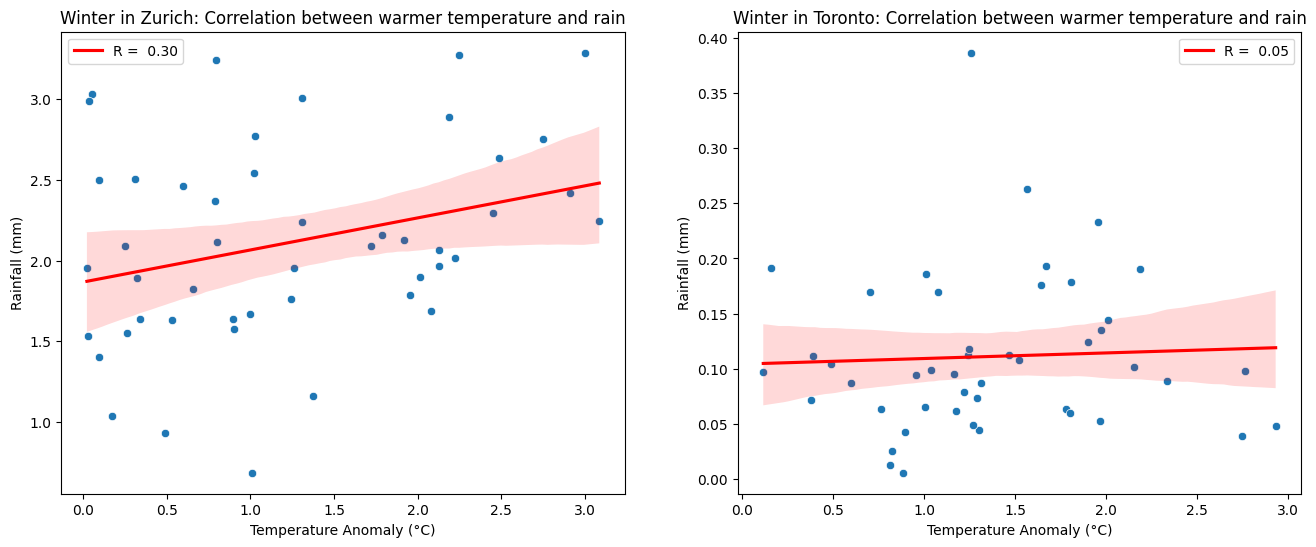

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
# Creating a 1x2 grid of plots for side-by-side comparison
fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(16, 6)) 

plt.figure(figsize = (8,6))

# Taking the temp_anomaly and rain_sum column with iltering the dataset for warmer winter days in Zurich
x = winter_stats[(winter_stats['warmer_flag'] == 1) & (winter_stats['City'] == 'Zurich')]['temp_anomaly']
y = winter_stats[(winter_stats['warmer_flag'] == 1) & (winter_stats['City'] == 'Zurich')]['rain_sum']

# Creating the scatterplot
sns.scatterplot(x = x, y = y, ax = ax5)

# Adding a regression line to visualize the trend
sns.regplot(x=x, y=y, scatter=False, color = 'red', label= f'R = {linregress(x, y).rvalue: .2f}', ax = ax5)

# Setting labels and tittles
ax5.set_xlabel('Temperature Anomaly (°C)')
ax5.set_ylabel('Rainfall (mm)')
ax5.legend()
ax5.set_title('Winter in Zurich: Correlation between warmer temperature and rain')


plt.figure(figsize = (8,6))

# Taking the temp_anomaly and rain_sum column with iltering the dataset for warmer winter days in Toronto
a = winter_stats[(winter_stats['warmer_flag'] == 1) & (winter_stats['City'] == 'Toronto')]['temp_anomaly']
b = winter_stats[(winter_stats['warmer_flag'] == 1) & (winter_stats['City'] == 'Toronto')]['rain_sum']

# Creating the scatterplot
sns.scatterplot(x = a, y = b, ax = ax6)

# Adding a regression line to visualize the trend
sns.regplot(x=a, y=b, scatter=False, color = 'red', label= f'R = {linregress(a, b).rvalue: .2f}', ax = ax6)

# Setting labels and tittles
ax6.set_xlabel('Temperature Anomaly (°C)')
ax6.set_ylabel('Rainfall (mm)')
ax6.legend()
ax6.set_title('Winter in Toronto: Correlation between warmer temperature and rain')

# Adjust layout
plt.tight_layout()

# Displaying the plot
plt.show()

The temperature anomaly is defined by taking the gap of the winter's temperature and the average winter's temperature of all time. This is to show which year's winter considered warmer than usual. Subsequently, those winter's temperature will be used for this scatterplot to display the correlation. 

In Zurich, the scatterplot suggests that when winter temperatures rise above the typical range (positive temperature anomalies), there tends to be more rainfall. The correlation coefficient of around 0.30 indicates a lower moderate positive relationship, meaning warmer-than-usual winters often go hand in hand with higher winter rain. 

In Toronto, however, the correlation is much weaker, at about 0.05, indicating that warmer winters don’t necessarily bring more rain. This difference could be due to Toronto’s colder climate, where winter precipitation often falls as snow instead of rain—even if the temperature is slightly above normal.

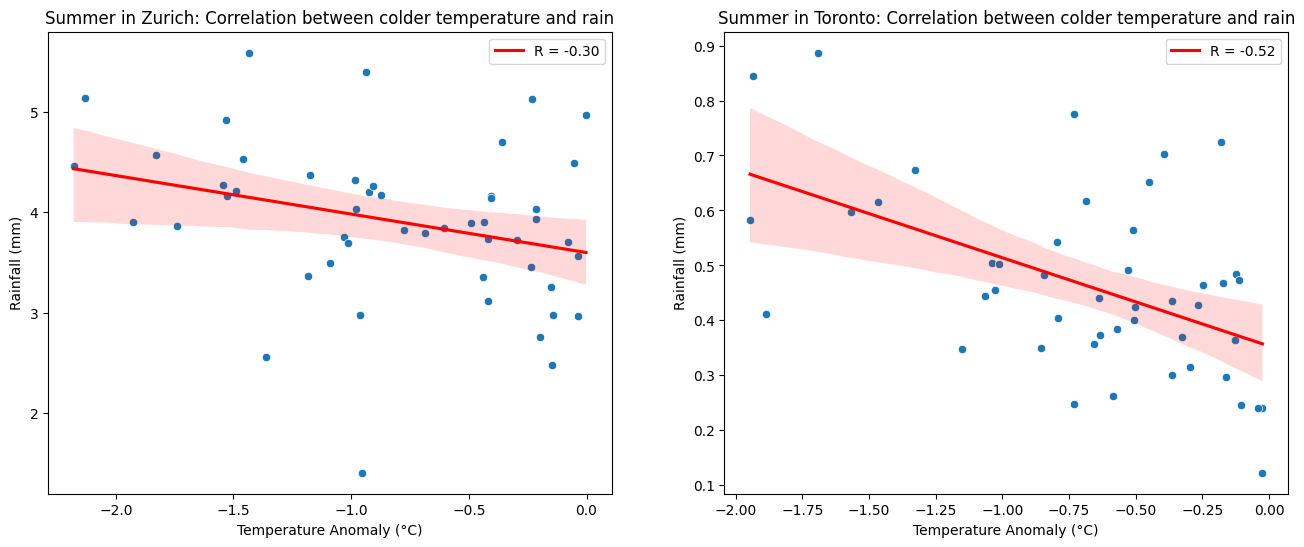

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
# Creating a 1x2 grid of plots for side-by-side comparison
fig, (ax7, ax8) = plt.subplots(1, 2, figsize=(16, 6))

plt.figure(figsize = (8,6))

# Taking the temp_anomaly and rain_sum column with iltering the dataset for colder summer days in Zurich
c = summer_stats[(summer_stats['colder_flag'] == 1) & (summer_stats['City'] == 'Zurich')]['temp_anomaly']
d = summer_stats[(summer_stats['colder_flag'] == 1) & (summer_stats['City'] == 'Zurich')]['rain_sum']

# Creating the scatterplot
sns.scatterplot(x=c, y=d, ax = ax7)

# Adding a regression line to visualize the trend
sns.regplot(x = c, y = d, scatter = False, color = 'red', label = f'R = {linregress(c, d).rvalue: .2f}', ax = ax7)

# Setting labels and tittles
ax7.set_xlabel('Temperature Anomaly (°C)')
ax7.set_ylabel('Rainfall (mm)')
ax7.legend()
ax7.set_title('Summer in Zurich: Correlation between colder temperature and rain')


plt.figure(figsize = (8,6))

# Taking the temp_anomaly and rain_sum column with iltering the dataset for colder summer days in Toronto
e = summer_stats[(summer_stats['colder_flag'] == 1) & (summer_stats['City'] == 'Toronto')]['temp_anomaly']
f = summer_stats[(summer_stats['colder_flag'] == 1) & (summer_stats['City'] == 'Toronto')]['rain_sum']

# Creating the scatterplot
sns.scatterplot(x=e, y=f, ax = ax8)

# Adding a regression line to visualize the trend
sns.regplot(x = e, y = f, scatter = False, color = 'red', label = f'R = {linregress(e, f).rvalue: .2f}', ax = ax8)

# Setting labels and tittles
ax8.set_xlabel('Temperature Anomaly (°C)')
ax8.set_ylabel('Rainfall (mm)')
ax8.legend()
ax8.set_title('Summer in Toronto: Correlation between colder temperature and rain')

# Adjust layout
plt.tight_layout()

# Displaying the plot
plt.show()


This negative correlation suggests that when either city experiences cooler-than-average summer conditions, it’s often because increased cloud cover and rainfall are cooling the environment. In Zurich, the moderate correlation (around -0.30) implies that rainfall plays a role in slightly lowering summer temperatures. But other weather factors can contribute to temperature variability. 

In Toronto, the stronger negative correlation (around -0.52) indicates that rainfall has a more pronounced cooling effect during the summer, possibly due to more frequent or intense convective storms that bring both rain and rapid cooling. But if the temperature falls more below than average of Toronto's (over -1.25 Celsius degree), there is less likely to have rainfall, even though some of the summer may experience heavier rainfall than usual.

# 9. The dependencies between weather features 

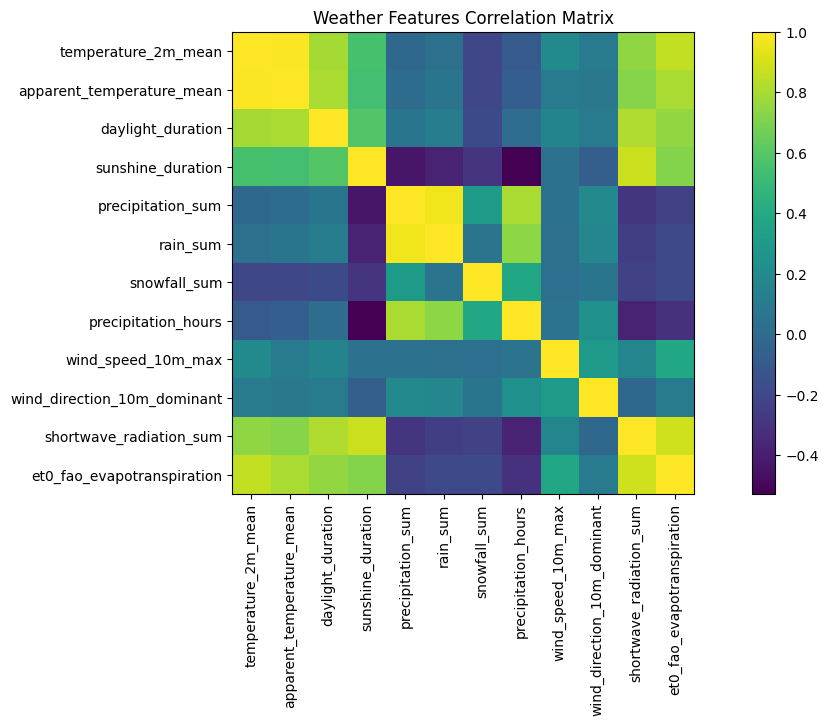

In [ ]:
# Selecting relevant weather-related columns for analysis and calculating the correlation matrix for the selected features
corr_matrix = df[['temperature_2m_mean', 'apparent_temperature_mean',
       'daylight_duration', 'sunshine_duration', 'precipitation_sum',
       'rain_sum', 'snowfall_sum', 'precipitation_hours', 'wind_speed_10m_max','wind_direction_10m_dominant',
       'shortwave_radiation_sum', 'et0_fao_evapotranspiration']].corr()

# Setting the figure size for better readability of the matrix
plt.figure(figsize=(15, 6))

# Displaying the correlation matrix as an image using a colormap ('viridis')
plt.imshow(corr_matrix, cmap='viridis', interpolation='none')

# Adding a color bar to the right to indicate the correlation strength (from -1 to 1)
plt.colorbar()

# Setting the tick labels for the matrix columns and rows
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)

# Adding a title to the plot
plt.title('Weather Features Correlation Matrix')

# Displaying the plot
plt.show()